In [1]:
import os
from scipy import io
import sys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
sys.path.append('../../src')
import utils as UT

In [2]:
doUT = UT.MakeSQL()

host:  192.168.0.128
user:  diadmin
password:  Dinsight0625!
database:  DeepInSight


SQL connection done


In [3]:
df2 = doUT.search_SQL('NVgave_synthetic_dataset')

In [4]:
df2.head()

,id,img_dir,label_dir,label_format,archive,image,regionmask_withskin,regionmask_withoutskin,eye,eye_x,...,iris_texture_f,pupil_center_x_4mm_dilation,pupil_center_x_6mm_dilation,pupil_center_y_4mm_dilation,pupil_center_y_6mm_dilation,pupil_size,slippage_x,slippage_y,slippage_z,iris_texture_i
0,1,DataBase\NVgave_synthetic_dataset\data\rawdata...,DataBase\NVgave_synthetic_dataset\data\labelda...,csv,footage_image_data.zip,type_img_frame_0000.png,type_maskWithSkin_frame_0000.png,type_maskWithoutSkin_frame_0000.png,L,-62.55789995,...,-1.0,0.19089478,0.15952637,0.08917394,0.08874336,0.03401118,-4.59195575,-6.18224655,-4.00450387,-1.0
1,2,DataBase\NVgave_synthetic_dataset\data\rawdata...,DataBase\NVgave_synthetic_dataset\data\labelda...,csv,footage_image_data.zip,type_img_frame_0001.png,type_maskWithSkin_frame_0001.png,type_maskWithoutSkin_frame_0001.png,L,-62.55789995,...,-1.0,0.19089478,0.15952637,0.08917394,0.08874336,0.03627901,-4.39481429,-0.26166741,-4.04349362,-1.0
2,3,DataBase\NVgave_synthetic_dataset\data\rawdata...,DataBase\NVgave_synthetic_dataset\data\labelda...,csv,footage_image_data.zip,type_img_frame_0002.png,type_maskWithSkin_frame_0002.png,type_maskWithoutSkin_frame_0002.png,L,-62.55789995,...,-1.0,0.19089478,0.15952637,0.08917394,0.08874336,0.02834901,-4.38509201,-9.92566039,-4.40250825,-1.0
3,4,DataBase\NVgave_synthetic_dataset\data\rawdata...,DataBase\NVgave_synthetic_dataset\data\labelda...,csv,footage_image_data.zip,type_img_frame_0003.png,type_maskWithSkin_frame_0003.png,type_maskWithoutSkin_frame_0003.png,L,-62.55789995,...,-1.0,0.19089478,0.15952637,0.08917394,0.08874336,0.06556307,-4.9549567,-9.74010032,-4.44783903,-1.0
4,5,DataBase\NVgave_synthetic_dataset\data\rawdata...,DataBase\NVgave_synthetic_dataset\data\labelda...,csv,footage_image_data.zip,type_img_frame_0004.png,type_maskWithSkin_frame_0004.png,type_maskWithoutSkin_frame_0004.png,L,-62.55789995,...,-1.0,0.19089478,0.15952637,0.08917394,0.08874336,0.02945895,-4.80205416,-8.9498643,-4.58870337,-1.0


In [5]:
df1 = df2[['gaze_x_degree','gaze_y_degree']]

In [6]:
df1 = df1.astype(float)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 2 columns):
 #   Column         Dtype  
---  ------         -----  
 0   gaze_x_degree  float64
 1   gaze_y_degree  float64
dtypes: float64(2)
memory usage: 30.5 MB


In [ ]:
UT.EDA.draw_heatmap(df1,'gaze_x_degree','gaze_y_degree','C:\\search_SQLork\\Database\\code\\DB_Tools\\pic\\NVgaze_synthetic_dataset\\fig2.png')

Caution: this process need a lot of time
save C:\lee\work\Database\code\DB_Tools\pic\NVgaze_synthetic_dataset\fig1.png


<Figure size 1600x1200 with 0 Axes>

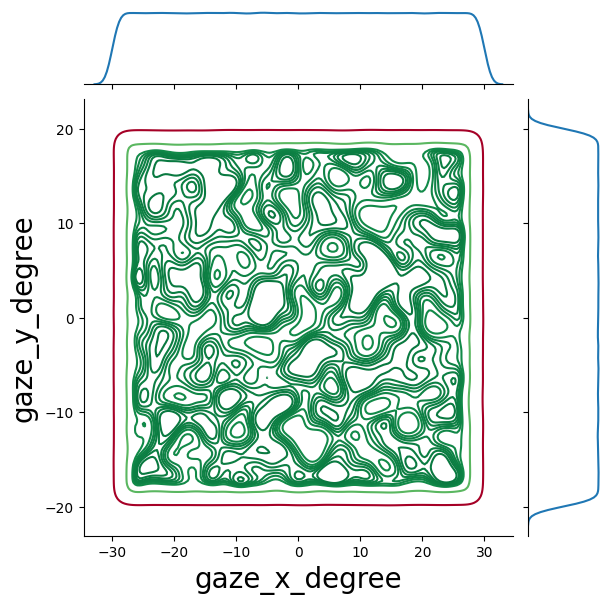

In [8]:
UT.EDA.draw_jointplot(df1,'gaze_x_degree','gaze_y_degree','C:\\lee\\work\\Database\\code\\DB_Tools\\pic\\NVgaze_synthetic_dataset\\fig1.png')

# 이미지 정보 확인하기

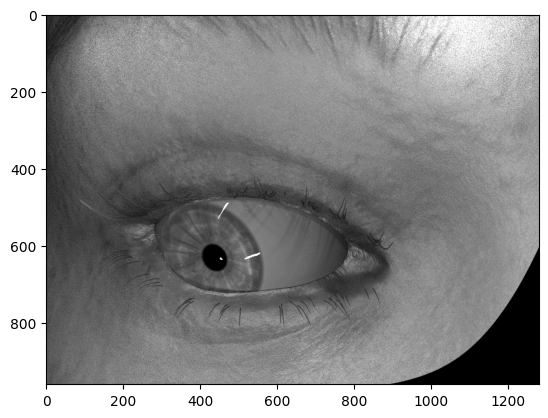

In [10]:
image_path = df['img_dir'][0].replace('DataBase','Z:\\')

image = cv2.imread(image_path)

plt.imshow(image)
plt.show()

# 이미지 시각화

## GAZE

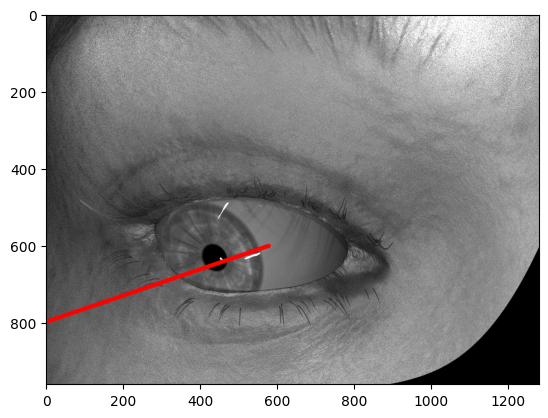

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_gaze_arrow(image_path, gaze_degree_x, gaze_degree_y):
    # Load the image
    image = cv2.imread(image_path)

    # Calculate the center of the image
    height, width, _ = image.shape
    center = (-62 + width // 2, 121 + height // 2)

    # Calculate the endpoint of the arrow based on gaze degree
    arrow_length = 1000
    endpoint_x = center[0] - int(arrow_length * np.cos(np.radians(gaze_degree_x)))
    endpoint_y = center[1] - int(arrow_length * np.sin(np.radians(gaze_degree_y)))

    # Draw arrow on the image
    arrow_color = (0, 0, 255)  # Red color for the arrow
    arrow_thickness = 10
    cv2.arrowedLine(image, (center[0], center[1]), (endpoint_x, endpoint_y), arrow_color, arrow_thickness)

    # Display the image with arrow using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

# Example usage
image_path =  os.path.join("nsmount", "NVgaze", "data", "synthetic_dataset", "rawdata", "nvgaze_female_01_public_50K_1", "type_img_frame_0000.png")
gaze_degree_x = -25  # Replace with the actual gaze degree value for x
gaze_degree_y = -18  # Replace with the actual gaze degree value for y
display_gaze_arrow(image_path, gaze_degree_x, gaze_degree_y)

## LANDMARK

In [ ]:
min_value =  # Replace with the actual minimum value in the original range
max_value =  # Replace with the actual maximum value in the original range

def normalize_to_actual(normalized_value):
    return normalized_value * (max_value - min_value) + min_value

def 

# 데이터분석

In [ ]:
label_path =  os.path.join("nsmount", "NVgaze", "data", "synthetic_dataset", "labeldata", "nvgaze_female_01_public_50K_1", "footage_description.csv")

for la